# TMA 07 - Modelling Report
### [Traffic Signs Manual](https://www.gov.uk/government/publications/traffic-signs-manual)

----
&nbsp;
Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data <a class="anchor" id="section-1"></a>


----
&nbsp;
### 90 Bars

#### Table 6-1 DataFrame
Spacing of bars on main carriageway pg, 73 of the above source

Data copied & pasted to .csv file `90_bars`

In [2]:
markings = pd.read_csv('90_bars.csv')
markings = markings.iloc[::-1]
markings = markings.sort_values(by='distance_from_D1')
print("The '90 Bars' DataFrame")
markings.head()

The '90 Bars' DataFrame


,bar_number,distance_from_D1
0,D1,0.00
1,D2,2.75
2,D3,5.50
3,D4,8.25
4,D5,11.05


We need to reverse the order of the table in [Traffic Signs Manual](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/773421/traffic-signs-manual-chapter-05.pdf) in accordance with our model

- D90 is now D1 etc

In [3]:
distances = markings['distance_from_D1'].tolist()
distances.reverse()
new_distances = [0]
for i in range(1, len(distances)):
    distance = round(distances[0] - distances[i], 2)
    new_distances.append(distance)

markers = markings['bar_number'].tolist()

In [4]:
ninety_bars = pd.DataFrame({'bar_number': markers, 'distance_from_D1': new_distances})
ninety_bars.head()

,bar_number,distance_from_D1
0,D1,0.00
1,D2,7.70
2,D3,15.35
3,D4,23.05
4,D5,30.75


----
&nbsp;
### 45 Bars

#### Table 6-2 DataFrame
Spacing of bars on slip road pg, 73 of the above source
Data copied & pasted to .csv file `45_bars`

In [5]:
markings2 = pd.read_csv('45_bars.csv')
markings2 = markings2.iloc[::-1]
markings2 = markings2.sort_values(by='distance_from_D1')
print("The '45 bar markings' DataFrame")
markings2.head()

The '45 bar markings' DataFrame


,bar_number,distance_from_D1
0,D1,0.00
1,D2,2.75
2,D3,5.55
3,D4,8.45
4,D5,11.35


We reverse
- D45 is now D1 etc

In [6]:
distances2 = markings2['distance_from_D1'].tolist()
distances2.reverse()
new_distances2 = [0]
for i in range(1, len(distances2)):
    distance2 = round(distances2[0] - distances2[i], 2)
    new_distances2.append(distance2)

markers2 = markings2['bar_number'].tolist()

In [7]:
fortyfive_bars = pd.DataFrame({'bar_number': markers2, 'distance_from_D1': new_distances2})
fortyfive_bars.head()

,bar_number,distance_from_D1
0,D1,0.0
1,D2,7.7
2,D3,15.4
3,D4,22.6
4,D5,29.3


----

## Our Model <a class="anchor" id="section-2"></a>

----

#### Equations of Motion
&nbsp;
constant accelerated motion in one dimension

$$a=a_{0}$$
$$v=u+a_{0} t$$
$$x=x_{0}+ut+\frac{1}{2}a_{0} t^{2}$$
$$v^{2}=u^{2}+2a_{0}D$$

----
&nbsp;
### Import Functions from `functions.py`

In [8]:
import functions

#### Functions;

- `metres_per_second()` - takes initial and final velocity in miles per hour and returns metres per second
- `calculate_distances()` - takes ($u$, $v$, $D$, $n$, thinking_time(seconds), default is 0.0, use_thinking_distance(Bool), default is False)
- `distance_dk()` - takes a list and returns absolute value $d_{k}$ between each $D_n$
- `plot_graph_dk()` takes model and real_world lists as input, returns graph with distance $d_k$ on $y$-axis
- `plot_subgraphs_dk()` - takes real_world and model with thinking time vs. no thinking time, returns side-by-side plots with $d_k$ on $y$-axis
- `velocity_time_graph()` - same parameters as `calculate_distances` returns velocity/time graph
- `dataframe()` - creates a dataframe of the real world and model; thinking & no thinking - requires 3 lists
- `stats()` - Runs summary statistics and produces a box plot on the DataFrame above

In [9]:
# Find u and v values in metres per second
functions.metres_per_second(70, 30)

70 mph is 31.293 metres per second
30 mph is 13.411 metres per second


----
&nbsp;
### Main road model, $D=403.95$ & $n=90$

In [10]:
no_thinking_90 = functions.calculate_distances(u=31.293, v=13.411, D=403.95, n=90)

In [11]:
#print(no_thinking_90)

In [12]:
# Highway code default of 0.67 seconds of thinking time
# Apply this thinking time in this iteration
thinking_90 = functions.calculate_distances(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

In [13]:
#print(thinking_90)

----
&nbsp;
### Slip road model, $D=199.30$ & $n=45$

In [14]:
no_thinking_45 = functions.calculate_distances(u=31.293, v=13.411, D=199.30, n=45)

In [15]:
#print(no_thinking_45)

In [16]:
# Highway code default of 0.67 seconds of thinking time
# Apply this thinking time in this iteration
thinking_45 = functions.calculate_distances(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

In [17]:
#print(thinking_45)

----
&nbsp;
#### Absolute values of distance $d_k$ between each bar $D_{n}$

#### Main road, $n=90$
&nbsp;
No thinking time

In [18]:
dk_90_no_thinking = functions.distance_dk(no_thinking_90)
#print(f"Model, 90 bars, NO Thinking time:\n\n{dk_90_no_thinking}")

Thinking time

In [19]:
dk_90_thinking = functions.distance_dk(thinking_90)
#print(f"Model, 90 bars + thinking time parameter:\n\n{dk_90_thinking}")

----
&nbsp;
#### Slip road, $n=45$
&nbsp;
No thinking time

In [20]:
dk_45_no_thinking = functions.distance_dk(no_thinking_45)
#print(f"Model, 45 bars, NO Thinking time:\n\n{dk_45_no_thinking}")

Thinking time

In [21]:
dk_45_thinking = functions.distance_dk(thinking_45)
#print(f"Model, 45 bars + thinking time parameter:\n\n{dk_45_thinking}")

----
&nbsp;
### Applying function to the test data

In [22]:
real_world_90 = functions.distance_dk(new_distances)
#print(real_world_90)

In [23]:
real_world_45 = functions.distance_dk(new_distances2)
#print(real_world_45)

----
&nbsp;
### We have a function that returns a sequence of the spacing of $n$ lines when given;

- an initial velocity
- a final velocity,
- a distance
- the integer number of lines required
&nbsp;
### Along with a function that returns the absolute distance between each line $d_{k}$ when given;

- The above sequence/list
&nbsp;
----


## Graphs comparing model to real-world data <a class="anchor" id="section-3"></a>

----
&nbsp;
##### Individual Plots

#### Transverse Bars, $n=90$, No thinking time

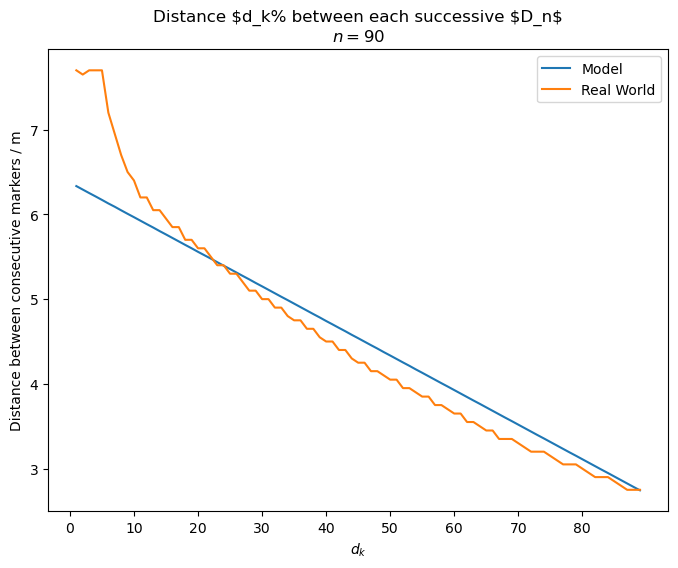

In [24]:
functions.plot_graph_dk(dk_90_no_thinking, real_world_90)

#### Transverse Bars, $n=90$, With thinking time

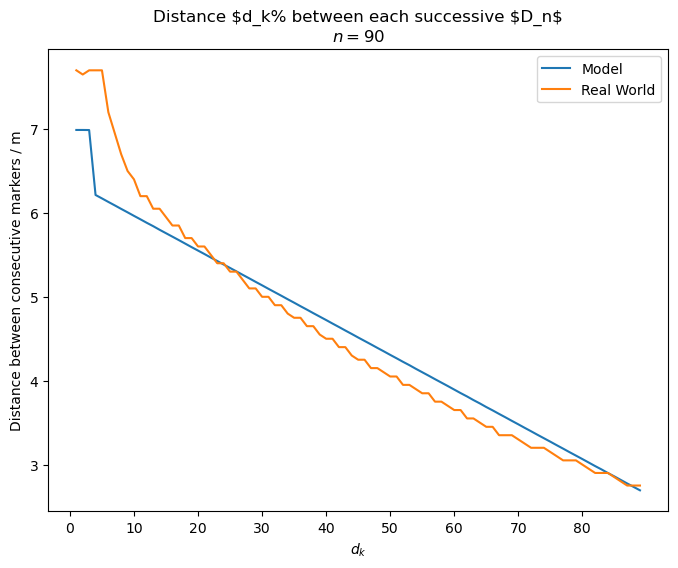

In [25]:
functions.plot_graph_dk(dk_90_thinking, real_world_90)

#### Transverse Bars, $n=45$, No thinking time

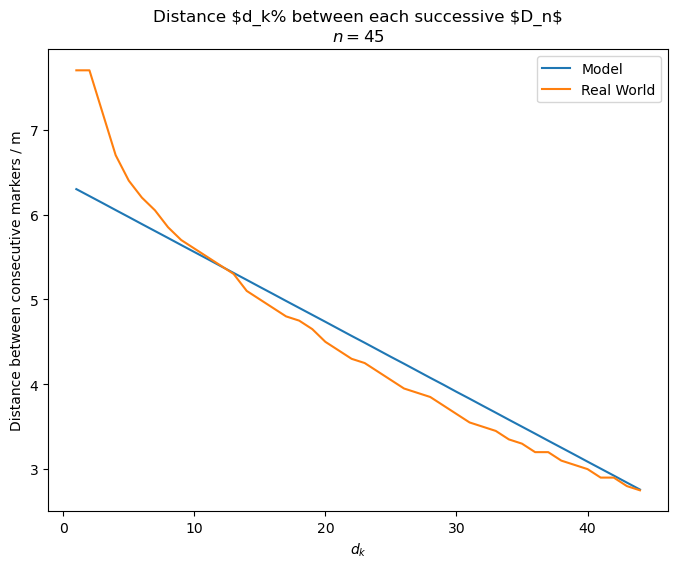

In [26]:
functions.plot_graph_dk(dk_45_no_thinking, real_world_45)

#### Transverse Bars, $n=45$, With thinking time

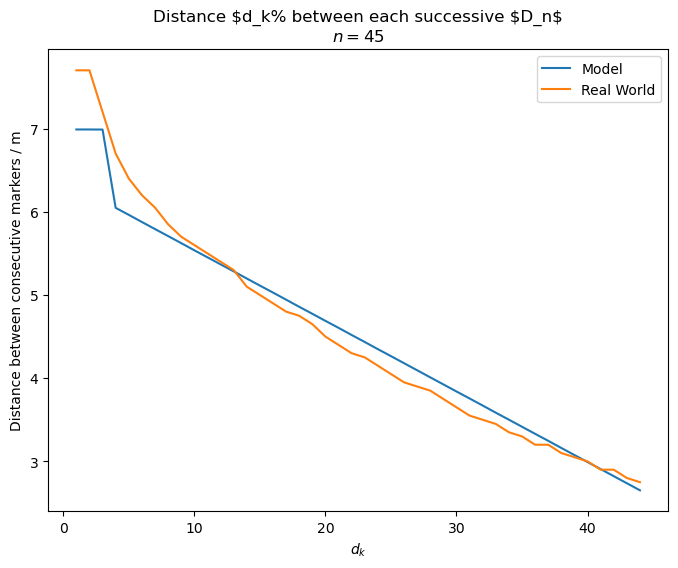

In [27]:
functions.plot_graph_dk(dk_45_thinking, real_world_45)

----
&nbsp;
##### Side by side plots

#### Transverse Bars, $n=90$
&nbsp;
Requires Lists

- `dk_90_no_thinking`
- `dk_90_thinking`
- `real_world_90`


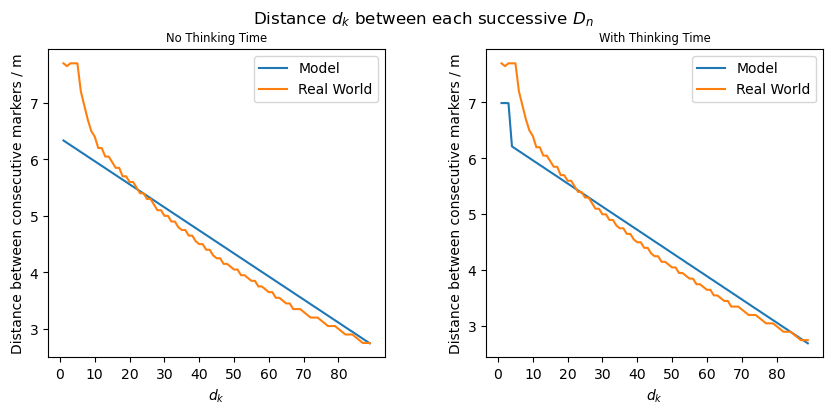

In [28]:
functions.plot_subgraphs_dk(dk_90_no_thinking, dk_90_thinking, real_world_90)

#### Transverse Bars, $n=45$
&nbsp;
Requires Lists

- `dk_45_no_thinking`
- `dk_45_thinking`
- `real_world_45`


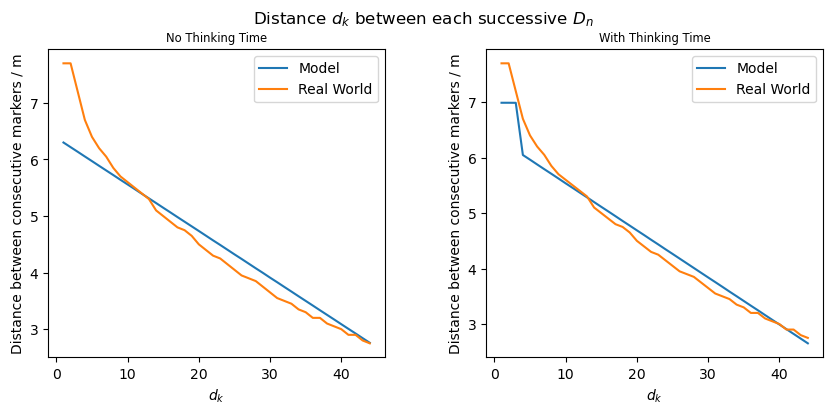

In [29]:
functions.plot_subgraphs_dk(dk_45_no_thinking, dk_45_thinking, real_world_45)

----

## Distance over time

### Distance/Time Graphs $n=90$

With the `Thinking Distance` model there are two values of $\delta t$

In [30]:
functions.get_delta_t(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

Delta_t1: 0.203059
Delta_t2: 0.199235


(0.203059, 0.199235)

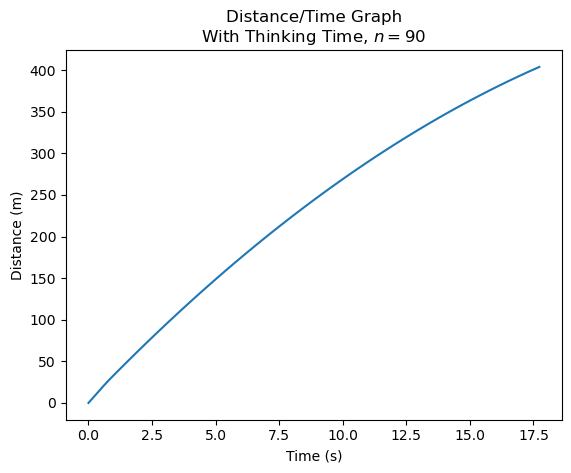

In [31]:
functions.distance_time_graph(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

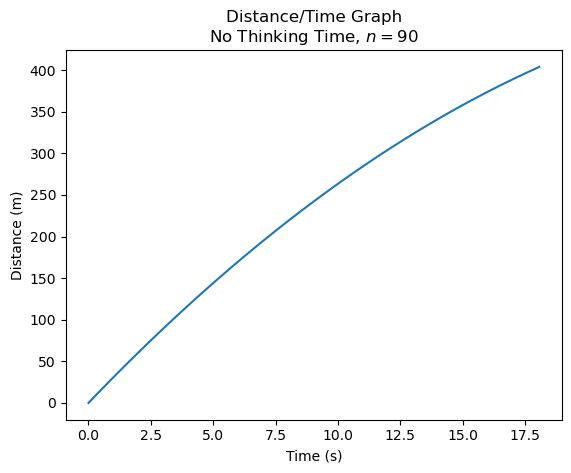

In [32]:
functions.distance_time_graph(u=31.293, v=13.411, D=403.95, n=90)

### Distance/Time Graphs $n=45$

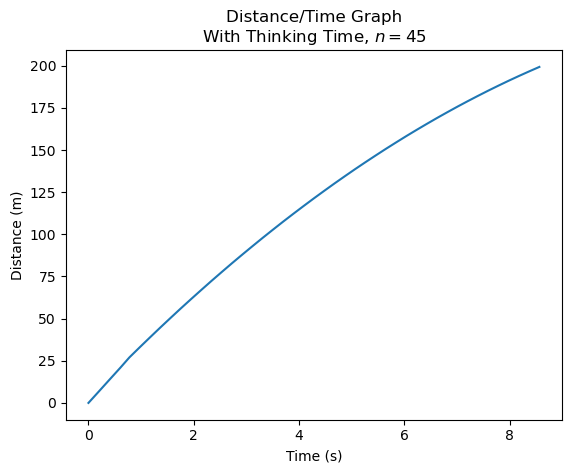

In [33]:
functions.distance_time_graph(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

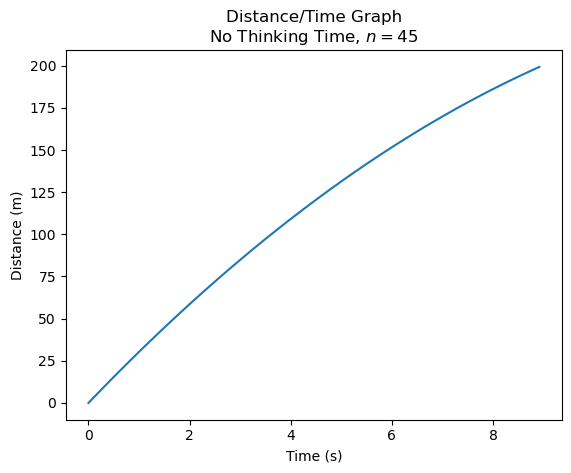

In [34]:
functions.distance_time_graph(u=31.293, v=13.411, D=199.30, n=45)

----

## Velocity over time

### Velocity/Time Graphs $n=90$

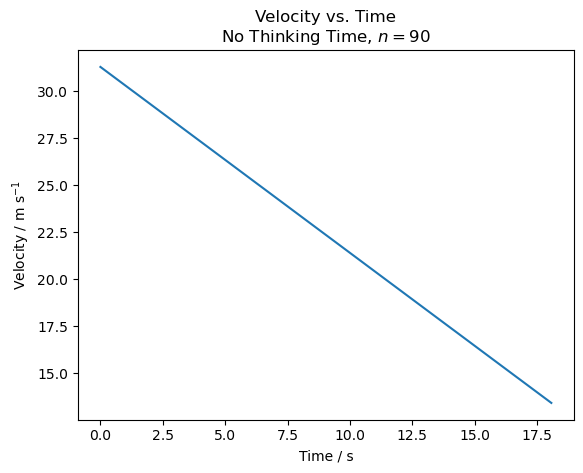

In [35]:
functions.velocity_time_graph(u=31.293, v=13.411, D=403.95, n=90)

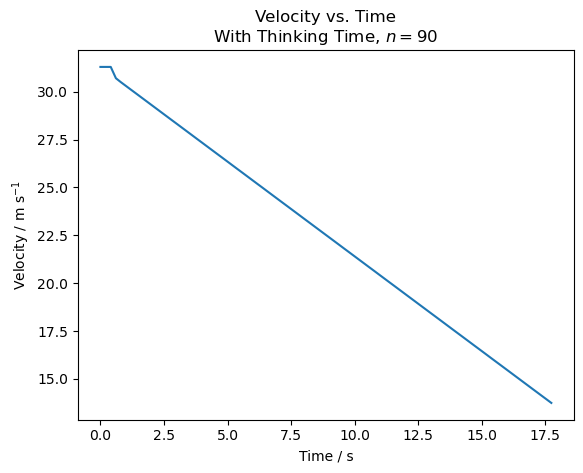

In [36]:
functions.velocity_time_graph(u=31.293, v=13.411, D=403.95, n=90, thinking_time=0.67, use_thinking_distance=True)

### Velocity/Time Graphs $n=45$

This time interval is not realistic...
Need to find out what constitutes speed limit on a 'slip road'

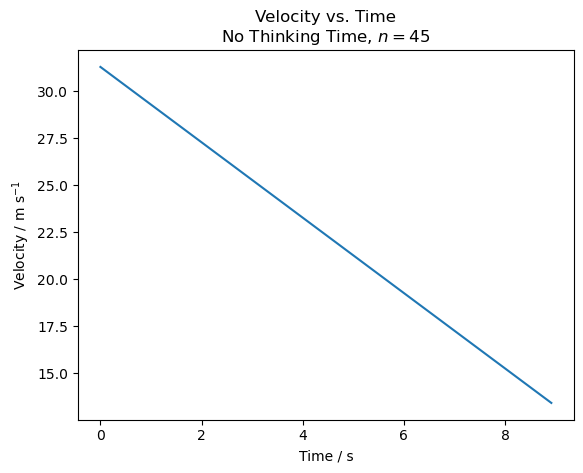

In [37]:
functions.velocity_time_graph(u=31.293, v=13.411, D=199.30, n=45)

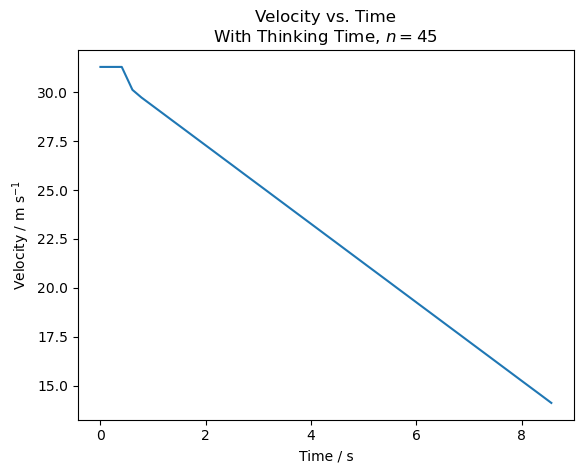

In [38]:
functions.velocity_time_graph(u=31.293, v=13.411, D=199.30, n=45, thinking_time=0.67, use_thinking_distance=True)

----


## Creating dataframes <a class="anchor" id="section-5"></a>

#### Transverse Bars, $n=90$
&nbsp;
Requires Lists

- `dk_90_no_thinking`
- `dk_90_thinking`
- `real_world_90`

In [34]:
df_90 = functions.dataframe(real_world_90, dk_90_thinking, dk_90_no_thinking)

In [35]:
df_90.head()

,d_k,real_world,thinking,no_thinking
0,d1,7.70,6.989,6.334
1,d2,7.65,6.989,6.293
2,d3,7.70,6.988,6.252
3,d4,7.70,6.214,6.212
4,d5,7.70,6.173,6.171


#### Transverse Bars, $n=45$
&nbsp;
Requires Lists

- `dk_45_no_thinking`
- `dk_45_thinking`
- `real_world_45`

In [36]:
df_45 = functions.dataframe(real_world_45, dk_45_thinking, dk_45_no_thinking)

In [37]:
df_45.head()

,d_k,real_world,thinking,no_thinking
0,d1,7.7,6.989,6.300
1,d2,7.7,6.989,6.218
2,d3,7.2,6.988,6.136
3,d4,6.7,6.047,6.053
4,d5,6.4,5.963,5.971


----


## Summary statistics <a class="anchor" id="section-6"></a>

90 Transverse bars


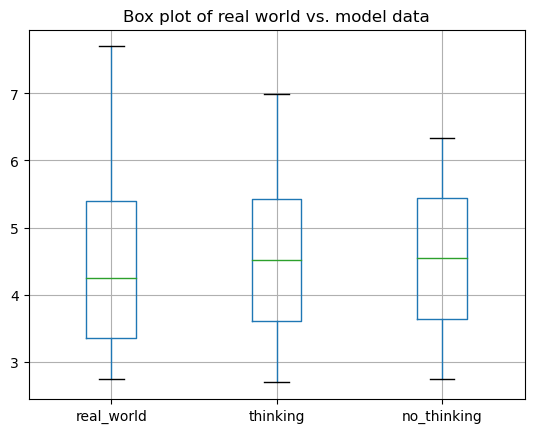


Summary Statistics:

       real_world   thinking  no_thinking
count   89.000000  89.000000    89.000000
mean     4.538764   4.538764     4.538764
std      1.367661   1.115943     1.054079
min      2.750000   2.693000     2.744000
25%      3.350000   3.604000     3.641000
50%      4.250000   4.515000     4.539000
75%      5.400000   5.427000     5.436000
max      7.700000   6.989000     6.334000


(None, None, None)

In [38]:
functions.stats(df_90)

45 Transverse bars


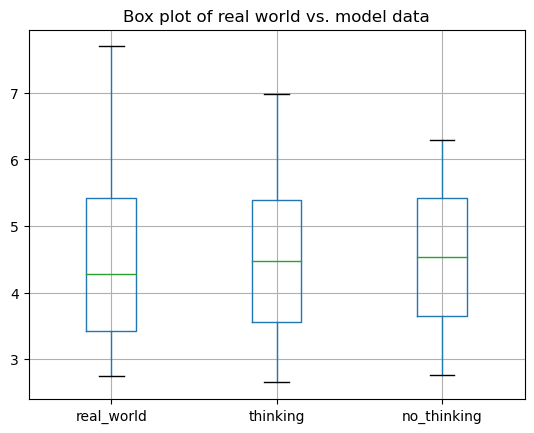


Summary Statistics:

       real_world   thinking  no_thinking
count   44.000000  44.000000    44.000000
mean     4.529545   4.529545     4.529545
std      1.352703   1.189267     1.057895
min      2.750000   2.652000     2.759000
25%      3.425000   3.564000     3.644250
50%      4.275000   4.477000     4.529500
75%      5.425000   5.389250     5.414750
max      7.700000   6.989000     6.300000


(None, None, None)

In [39]:
functions.stats(df_45)